# Model Fitting and Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 

In [2]:
# Create dataframe df containing csv data 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
# Remove rows with null values for our target variable
df = df[(df['FWB1_1'] != -1) & (df['FWB1_1'] != -4)]
# True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

# Replace -1 with NaNs
df.replace(-1, np.nan, inplace=True)
# Fill NA's with most common value for that variable
df = df.fillna(df.mode().iloc[0])

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Create X and y values for given variables
def get_data_from_cols(variable_list, data=df):
    
    # Subset variables we want
    dfx = data[variable_list]

    # Scale data using min-max
    scaler = MinMaxScaler()
    scaled_dfx = scaler.fit_transform(dfx)
    scaled_dfx = pd.DataFrame(scaled_dfx, columns=dfx.columns)

    # Create our X and y
    X = scaled_dfx.values
    y = df['target'].values
    
    return X, y

# Create a list of variables we want to include
variable_list = ['MANAGE1_3', 'FS1_2', 'PPINCIMP', 'EMPLOY1_5', 'PPHHSIZE']

# Get X and y values
X, y = get_data_from_cols(variable_list)
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# Get best parameters using grid search with 5 cross-validation folds
def get_grid_search_params(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid.fit(X_train, y_train)
    
    return grid.best_params_

# Plot ROC and output AUC score and classification report
def train_and_evaluate_model(model, title, logreg=False):
    
    # Train model
    model.fit(X_train, y_train)
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Plot ROC and show AUC 
    model_roc_auc = roc_auc_score(y_test, y_pred)
    # Use probabilities if using logistic regression model
    if logreg:
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Else use class predictions
    else:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    
    # Print classification report
    print(classification_report(y_test, y_pred))

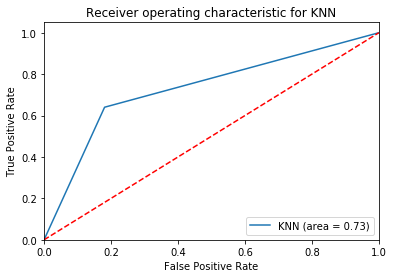

             precision    recall  f1-score   support

      False       0.79      0.82      0.80      1184
       True       0.69      0.64      0.66       731

avg / total       0.75      0.75      0.75      1915

None


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Create k nearest neighbors classifier
knn=KNeighborsClassifier()

# Create grid to search over
k_range = [1, 50, 100, 150, 200]
param_grid = dict(n_neighbors=k_range)

# Get optimized parameters
knn_params = get_grid_search_params(knn, param_grid)

# Train and evaluate KNN model
title = 'Receiver operating characteristic for KNN'
print(train_and_evaluate_model(KNeighborsClassifier(**knn_params), title))

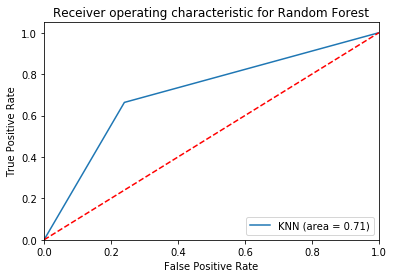

             precision    recall  f1-score   support

      False       0.79      0.76      0.77      1184
       True       0.63      0.66      0.65       731

avg / total       0.73      0.72      0.72      1915

None


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier
rf = RandomForestClassifier()

# Create grid to search over
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 6)]
param_grid = dict(n_estimators=n_estimators)

# Get optimized parameters
rf_params = get_grid_search_params(rf, param_grid)

# Evaluate random forest model
title = 'Receiver operating characteristic for Random Forest'
print(train_and_evaluate_model(RandomForestClassifier(**rf_params), title))

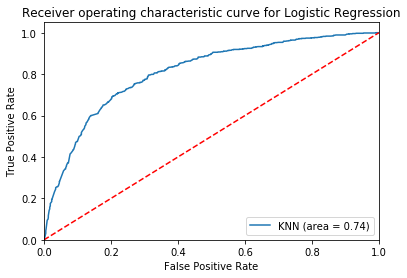

             precision    recall  f1-score   support

      False       0.79      0.82      0.81      1184
       True       0.69      0.65      0.67       731

avg / total       0.75      0.76      0.75      1915

None


In [7]:
from sklearn.linear_model import LogisticRegression

# Evaluate logistic regression model
title = 'Receiver operating characteristic curve for Logistic Regression'
print(train_and_evaluate_model(LogisticRegression(), title, logreg=True))

In [8]:
# Create a list of variables we want to include
variable_list = ['ACT1_2', 'MANAGE1_3', 'PPINCIMP', 'EMPLOY1_5']

# Get X and y values
X, y = get_data_from_cols(variable_list)
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

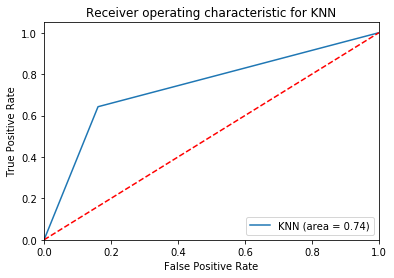

             precision    recall  f1-score   support

      False       0.81      0.84      0.82      1235
       True       0.69      0.64      0.66       680

avg / total       0.77      0.77      0.77      1915

None


In [9]:
# Create k nearest neighbors classifier
knn=KNeighborsClassifier()

# Create grid to search over
k_range = [1, 50, 100, 150, 200]
param_grid = dict(n_neighbors=k_range)

# Get optimized parameters
knn_params = get_grid_search_params(knn, param_grid)

# Evaluate KNN model
title = 'Receiver operating characteristic for KNN'
print(train_and_evaluate_model(KNeighborsClassifier(**knn_params), title))

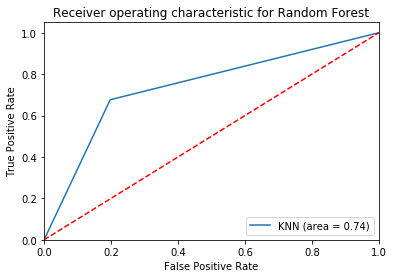

             precision    recall  f1-score   support

      False       0.82      0.80      0.81      1235
       True       0.65      0.68      0.66       680

avg / total       0.76      0.76      0.76      1915

None


In [10]:
# Create random forest classifier
rf = RandomForestClassifier()

# Create grid to search over
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 6)]
param_grid = dict(n_estimators=n_estimators)

# Get optimized parameters
rf_params = get_grid_search_params(rf, param_grid)

# Evaluate random forest model
title = 'Receiver operating characteristic for Random Forest'
print(train_and_evaluate_model(RandomForestClassifier(**rf_params), title))

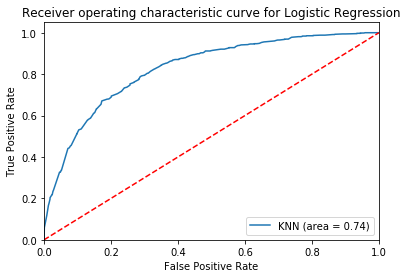

             precision    recall  f1-score   support

      False       0.81      0.84      0.82      1235
       True       0.69      0.63      0.66       680

avg / total       0.77      0.77      0.77      1915

None


In [11]:
# Evaluate logistic regression model
title = 'Receiver operating characteristic curve for Logistic Regression'
print(train_and_evaluate_model(LogisticRegression(), title, logreg=True))

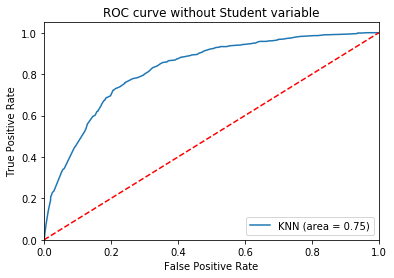

             precision    recall  f1-score   support

      False       0.81      0.82      0.81      1199
       True       0.69      0.67      0.68       716

avg / total       0.76      0.77      0.76      1915



In [12]:
# Look at effect of removing student variable

# Create a list of variables we want to include
variable_list = ['ACT1_2', 'MANAGE1_3', 'PPINCIMP']

# Get X and y values
X, y = get_data_from_cols(variable_list)
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Evaluate logistic regression model
title = 'ROC curve without Student variable'
train_and_evaluate_model(LogisticRegression(), title, logreg=True)

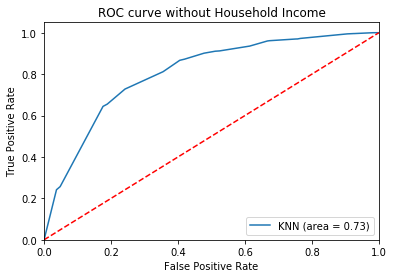

             precision    recall  f1-score   support

      False       0.79      0.81      0.80      1187
       True       0.68      0.66      0.67       728

avg / total       0.75      0.75      0.75      1915



In [13]:
# Look at effect of removing income variable

# Create a list of variables we want to include
variable_list = ['ACT1_2', 'MANAGE1_3']

# Get X and y values
X, y = get_data_from_cols(variable_list)
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Evaluate logistic regression model
title = 'ROC curve without Household Income'
train_and_evaluate_model(LogisticRegression(), title, logreg=True)

In [14]:
import statsmodels.api as sm

# Create a list of variables we want to include
variable_list = ['ACT1_2', 'MANAGE1_3', 'PPINCIMP']

# Get X and y values
X, y = get_data_from_cols(variable_list)
# Include intercept 
X_with_intercept = sm.add_constant(X)

# Fit logistic regression model and print summary results
logit_model=sm.Logit(y,X_with_intercept)
result=logit_model.fit()
print(result.summary2())

/home/hussain/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.492225
         Iterations 6
                         Results: Logit
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: y                Pseudo R-squared: 0.253    
Date:               2018-11-26 15:55 AIC:              6291.7409
No. Observations:   6383             BIC:              6318.7865
Df Model:           3                Log-Likelihood:   -3141.9  
Df Residuals:       6379             LL-Null:          -4207.3  
Converged:          1.0000           Scale:            1.0000   
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
const   -5.4952     0.1503   -36.5564   0.0000   -5.7899   -5.2006
x1       4.0146     0.1760    22.8070   0.0000    3.6696    4.3596
x2       1.7846     0.0976    18.2910   0.0000    1.5933    1.9758
x